# SUPPORT VECTOR MACHINE

**Reading the Dataset**

In [1]:
import pandas as pd

df = pd.read_csv('ionosphere.data',header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


**Data Preprocessing**

In [2]:
import numpy as np

dataset = df.values
for i in range(len(dataset)):
    dataset[i,-1] = 1.0 if dataset[i,-1] == 'b' else -1.0
dataset = np.array(list(dataset[:,:]), dtype=np.double)

**Split the Dataset into Taining and Test Datasets**

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset[:,:-1],dataset[:,-1],train_size = 0.8)

**SVM Classifier**

In [4]:
from matplotlib import pyplot as plt

def SoftMarginLinearSVM(X,y,C = 1.0, learning_rate = 0.0001, epochs = 5000):
    w = np.random.rand(X.shape[1])
    b = 0
    loss = []
    for _ in range(epochs):
        margin = (np.dot(X,w)+b)*y
        misclassified = np.where(margin < 1)[0]
        
        dw = w - C*np.dot(y[misclassified],X[misclassified])
        w = w - learning_rate*dw
        
        db = - C*sum(y[misclassified])
        b = b - learning_rate*db
        
        ls = (1/2)*np.dot(w,w) + C*sum(max(0,1-m) for m in margin)
        loss.append(ls)
    
    support_vectors = np.where((np.dot(X,w)+b)*y <=1)[0]
    print(f'{len(support_vectors)} support vectors out of {len(X)} points')
    plt.plot([x for x in range(1,epochs+1)],loss, color = 'red')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Epoch v/s Loss')
    plt.show()
    return w,b

**Train the Classifier**

83 support vectors out of 280 points


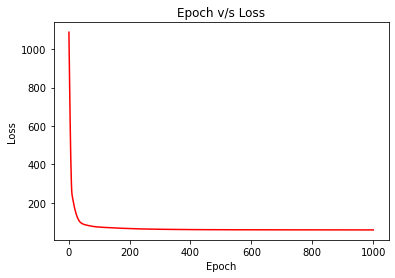

In [5]:
w,b = SoftMarginLinearSVM(X_train,y_train, C = 0.8, learning_rate = 0.001, epochs = 1000)

**Classification and Accuracy**

In [6]:
y_pred = []
for x in X_test:
    y_pred.append(np.sign(np.dot(w,x)+b))

In [7]:
from sklearn.metrics import accuracy_score

print(f'Testing Set Accuracy: {accuracy_score(y_test,y_pred)*100} %')

Testing Set Accuracy: 90.14084507042254 %
